# Translations fixing $L-R$ and $B$

In [1]:
import Permutations as pm
import sympy
from numpy.random import randint as ri
from ToolsForQuasiCord import *

sympy.init_printing()

import itertools

import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm

## Tamed matrix

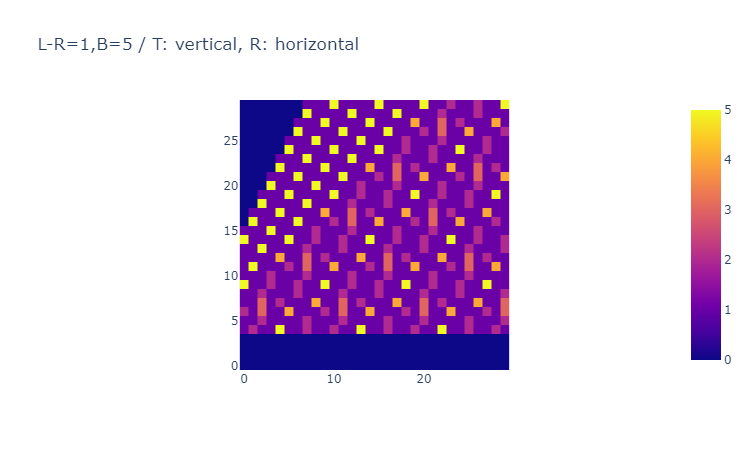

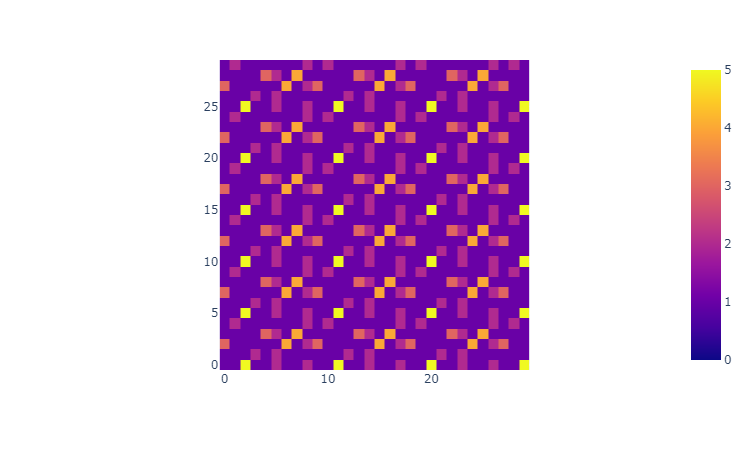

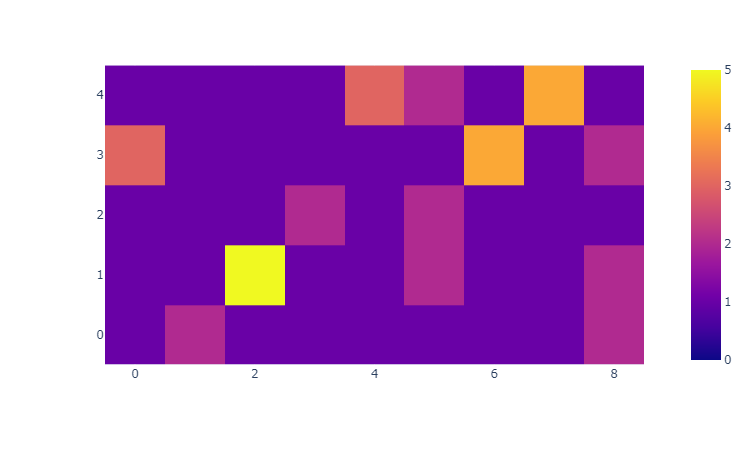

In [44]:
f, b = 1, 5
shift = abs(f - b)
size = 30
# ---
df = pd.read_csv(f"data/fix_L-R_B/L-R={f}_B={b}_100x100.csv")
px.imshow(
    df.values[:size, shift : shift + size],
    origin="lower",
    zmin=0,
    aspect="equal",
    title=f"L-R={f},B={b} / T: vertical, R: horizontal",
).show()

# ---
dftp = np.transpose(df.values)
tamed_matrix = []
for r in range(size):
    seq = []
    s = r
    for i in range(size):
        try:
            seq += [dftp[i + s + shift + r][shift + i]]
        except:
            seq += [0]
    tamed_matrix += [seq]
tamed_matrix = np.transpose(tamed_matrix)
px.imshow(tamed_matrix, origin="lower", zmin=0).show()

# ---
fig = px.imshow(
    tamed_matrix[shift : (shift + b), : abs(2 * b - f)],
    origin="lower",
    zmin=0,
    aspect="equal",
)
fig.show()

## Reduction

### Translation along L and R

 $\delta = |2b-f|$ として, $|T, L, B, R|=|T,L+\delta, B, R+\delta|$ が $T \leq R$ のときに成立すること。

In [45]:
N = 100
iteration_count = 200
count = 0
for itr in tqdm(range(iteration_count)):
    sqr = square_random_generator(N)
    c = sqr.code
    delta = abs(2 * c[2] - (c[1] - c[3]))
    # ---
    cn = list(c)
    cn[1] += delta
    cn[3] += delta
    cn = tuple(cn)
    # ---
    try:
        sqrn = Square(cn)
        n, nn = cc(sqr), cc(sqrn)
        if not n == nn:
            print(f"({n},{nn}), ({c},{cn}), delta={delta}, T-R={c[0]-c[3]}")
            if c[0]-c[3] <= 0:
                count += 1
    except:
        print(c, ed)
# ---
print(count)

  0%|          | 0/200 [00:00<?, ?it/s]

(2,1), ((67, 69, 26, 24),(67, 76, 26, 31)), delta=7, T-R=43
(1,2), ((57, 33, 13, 31),(57, 57, 13, 55)), delta=24, T-R=26
(1,2), ((71, 44, 9, 23),(71, 47, 9, 26)), delta=3, T-R=48
(2,1), ((87, 88, 63, 15),(87, 141, 63, 68)), delta=53, T-R=72
(3,1), ((93, 91, 21, 66),(93, 108, 21, 83)), delta=17, T-R=27
(2,1), ((85, 73, 25, 39),(85, 89, 25, 55)), delta=16, T-R=46
(2,1), ((93, 70, 7, 38),(93, 88, 7, 56)), delta=18, T-R=55
(2,1), ((56, 74, 33, 1),(56, 81, 33, 8)), delta=7, T-R=55
(32,13), ((79, 47, 60, 9),(79, 129, 60, 91)), delta=82, T-R=70
(2,1), ((51, 63, 25, 14),(51, 64, 25, 15)), delta=1, T-R=37
(1,2), ((88, 79, 70, 14),(88, 154, 70, 89)), delta=75, T-R=74
(2,1), ((30, 40, 28, 1),(30, 57, 28, 18)), delta=17, T-R=29
(4,1), ((77, 39, 8, 34),(77, 50, 8, 45)), delta=11, T-R=43
(1,3), ((72, 34, 47, 14),(72, 108, 47, 88)), delta=74, T-R=58
(4,3), ((79, 52, 24, 53),(79, 101, 24, 102)), delta=49, T-R=26
(5,1), ((77, 81, 21, 29),(77, 91, 21, 39)), delta=10, T-R=48
(4,1), ((65, 42, 26, 19),(65,